In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset?utm_source=chatgpt.com&select=Twitter_Data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nikcrazynitesh
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset


100%|██████████| 7.60M/7.60M [00:00<00:00, 832MB/s]

#  Load and Explore the Data

In [5]:
import pandas as pd

In [7]:
df= pd.read_csv("/content/twitter-sentiment-dataset/Twitter_Data.csv")

In [8]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# **Preprocess the Text Data**

In [11]:
import re
import pandas as pd

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['processed_text'] = df['clean_text'].apply(clean_text)

print(df[['clean_text', 'processed_text']].head())

                                          clean_text  \
0  when modi promised “minimum government maximum...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                      processed_text  
0  when modi promised minimum government maximum ...  
1  talk all the nonsense and continue all the dra...  
2  what did just say vote for modi  welcome bjp t...  
3  asking his supporters prefix chowkidar their n...  
4  answer who among these the most powerful world...  


# **Perform Sentiment Analysis**

In [13]:
from textblob import TextBlob


def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


df['sentiment_score'] = df['processed_text'].apply(get_sentiment)


print(df[['processed_text', 'sentiment_score']].head())

                                      processed_text  sentiment_score
0  when modi promised minimum government maximum ...        -0.300000
1  talk all the nonsense and continue all the dra...         0.000000
2  what did just say vote for modi  welcome bjp t...         0.483333
3  asking his supporters prefix chowkidar their n...         0.150000
4  answer who among these the most powerful world...         0.400000


# **Visualize the Results**

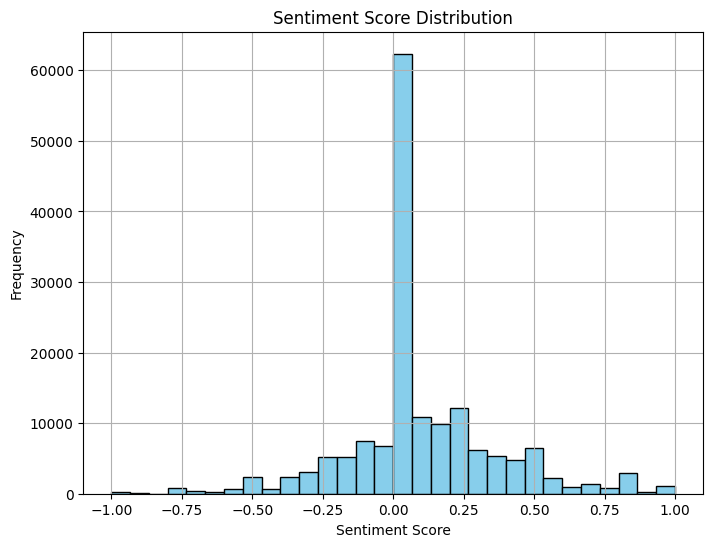

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['sentiment_score'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


**Summary Report**

Objective: Analyze the sentiment of tweets to understand public opinion.

Method: Cleaned the text data and applied sentiment analysis using TextBlob.

Findings: Generated sentiment scores indicating the polarity of each tweet.